# Modelo predictivo para puesto de trabajo en Empresa X como desarrollador web en el área de backend
### Yessenia Olvera Angeles
### Kevin Israel López Mendoza

## Importar librerias

In [1]:
import pandas as pd

In [2]:
work_prediction = pd.read_csv('works_oferts.csv')
work_prediction.head()

,name,edad,exp,node,sql,postgsql,aws,js,ningles,visap,hofice,estudios,probabilidad
0,Narmo,25,5,10,5,6,0,9,16.60,1,1,50,60.2350
1,Gustavo,21,3,8,9,8,2,8,33.00,0,1,25,29.2800
2,Mauricio,26,5,10,5,6,7,9,49.00,1,0,15,43.6500
3,Gabriel,30,7,10,8,8,9,10,66.40,1,0,20,81.4660
4,x,34,5,10,10,10,10,10,83.06,0,0,15,60.3135


## ver datos numericos de requisitos

In [3]:
numeric_requirements = ["exp","node","sql","postgsql","aws","js","ningles","visap","hofice","estudios"]
work_prediction[numeric_requirements + ["probabilidad"]].describe()


,exp,node,sql,postgsql,aws,js,ningles,visap,hofice,estudios,probabilidad
count,200.0000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5.4000,5.505000,5.485000,5.475000,5.435000,5.52000,43.744700,0.450000,0.450000,21.775000,51.756443
std,2.8725,2.953573,2.924472,2.934695,2.959658,2.95691,28.943021,0.498742,0.498742,14.474874,37.278130
min,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0000,3.000000,3.000000,3.000000,3.000000,3.00000,16.600000,0.000000,0.000000,15.000000,19.605000
50%,5.0000,5.500000,5.000000,6.000000,5.000000,6.00000,33.000000,0.000000,0.000000,15.000000,43.912500
75%,8.0000,8.000000,8.000000,8.000000,8.000000,8.00000,66.400000,1.000000,1.000000,25.000000,80.550000
max,10.0000,10.000000,10.000000,10.000000,10.000000,10.00000,99.000000,1.000000,1.000000,50.000000,172.550000


## trazo de historigrama de los porcentajes

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13280\584083157.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


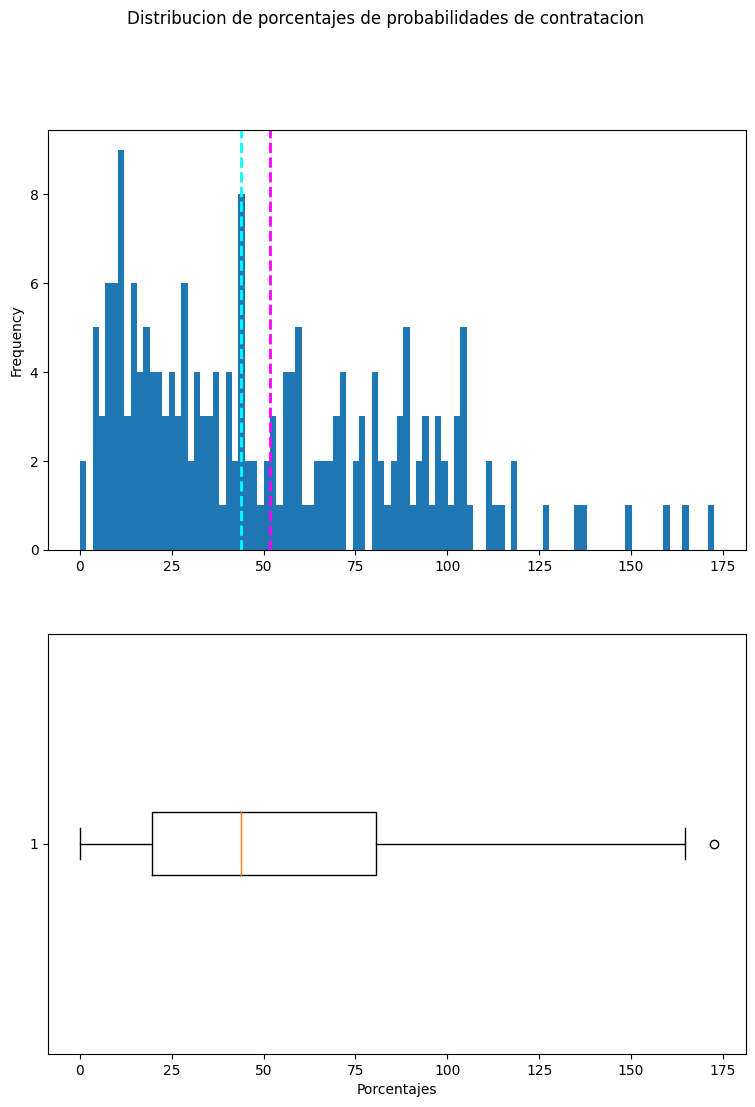

In [5]:
%matplotlib inline
label = work_prediction["probabilidad"]
fig, ax = plt.subplots(2,1, figsize = (9,12))
ax[0].hist(label,bins=100)
ax[0].set_ylabel("Frequency")
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Porcentajes')

fig.suptitle('Distribucion de porcentajes de probabilidades de contratacion')

fig.show()

## Trazo de historigrama por identidades numericas del csv

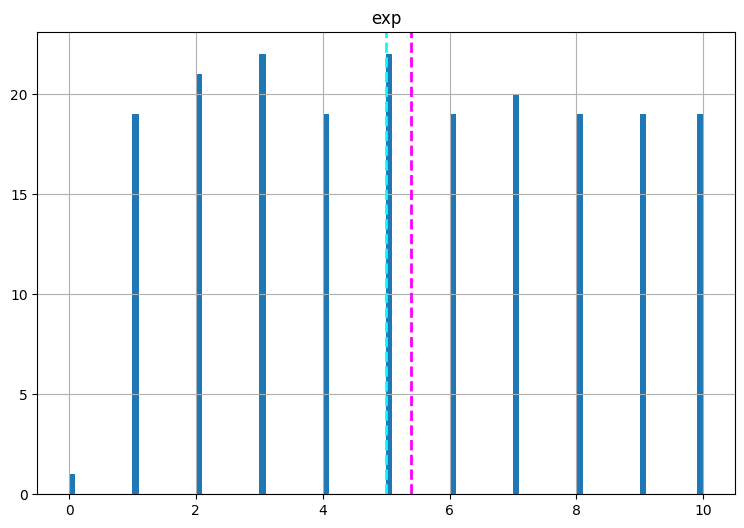

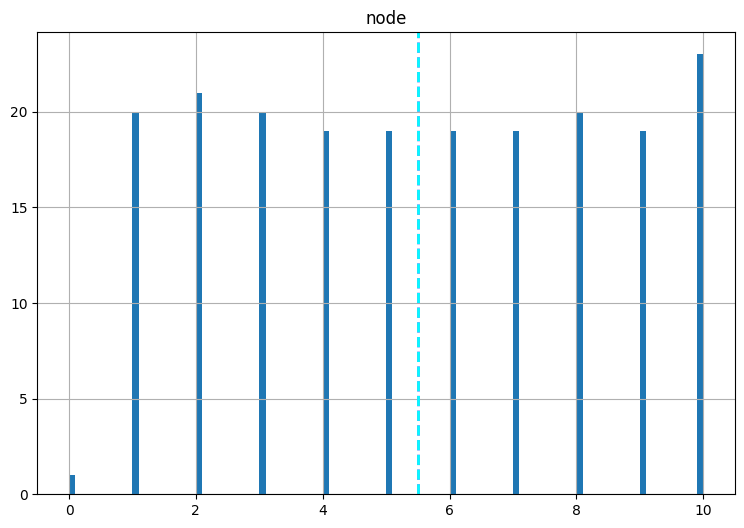

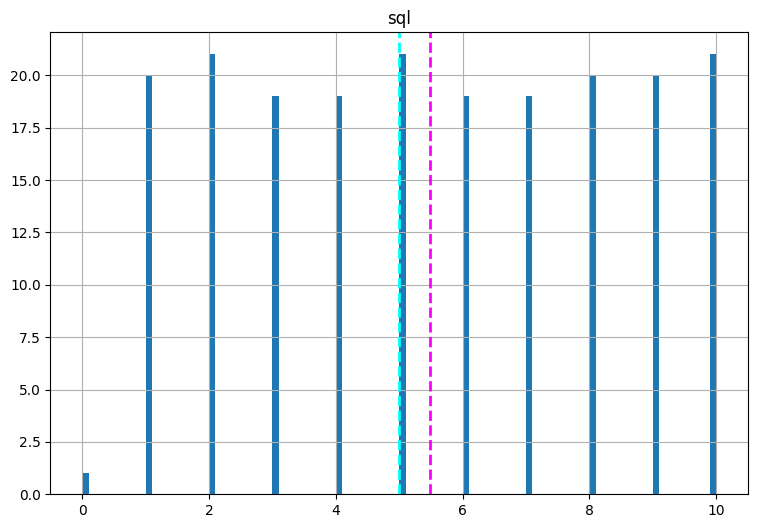

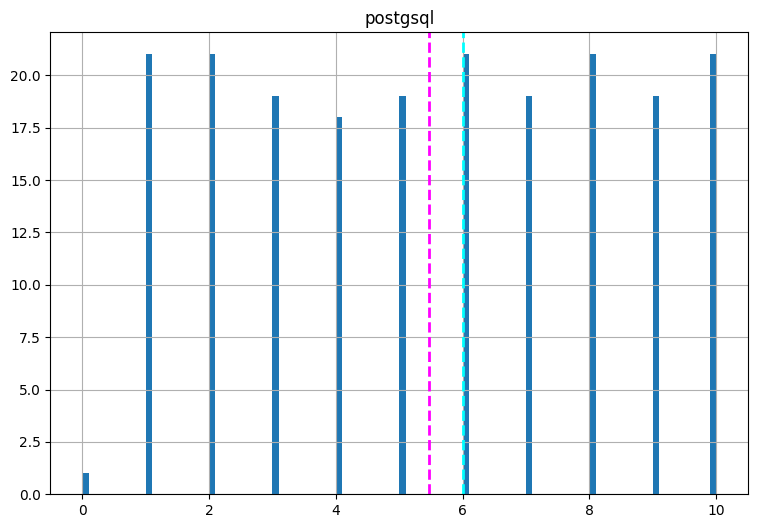

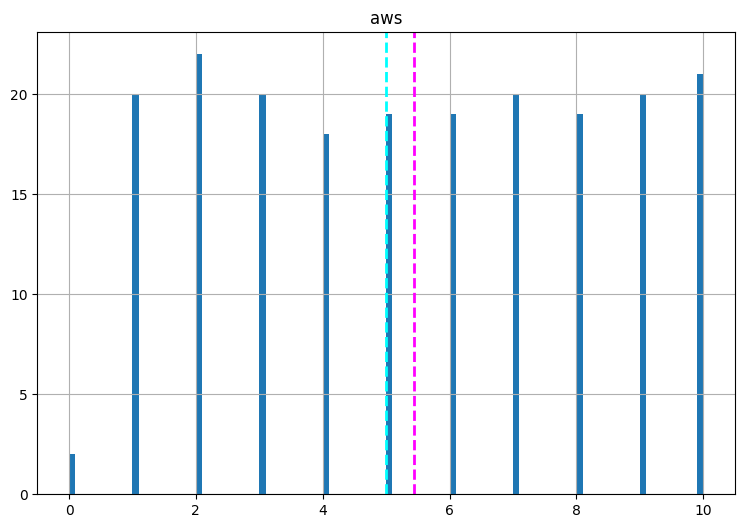

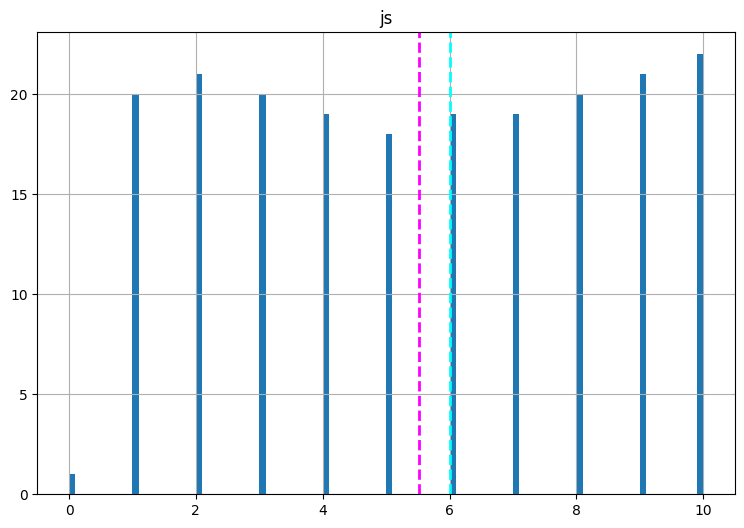

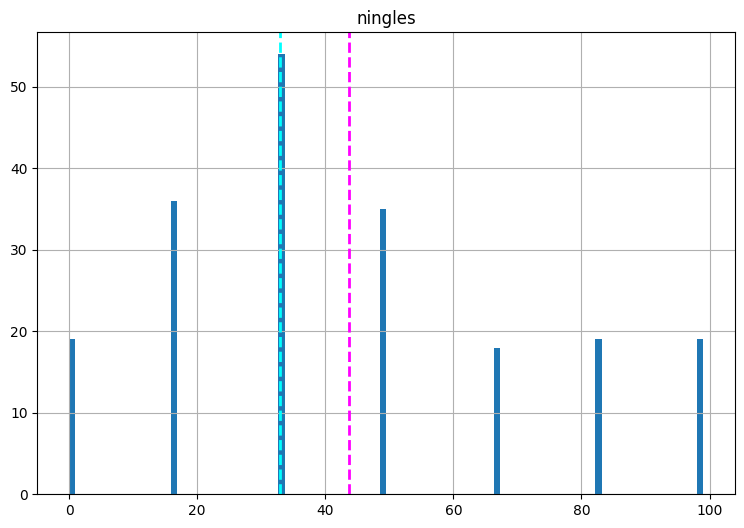

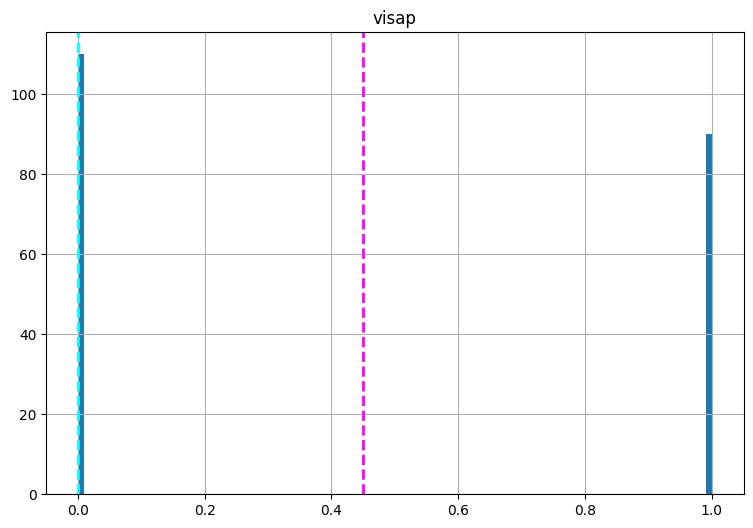

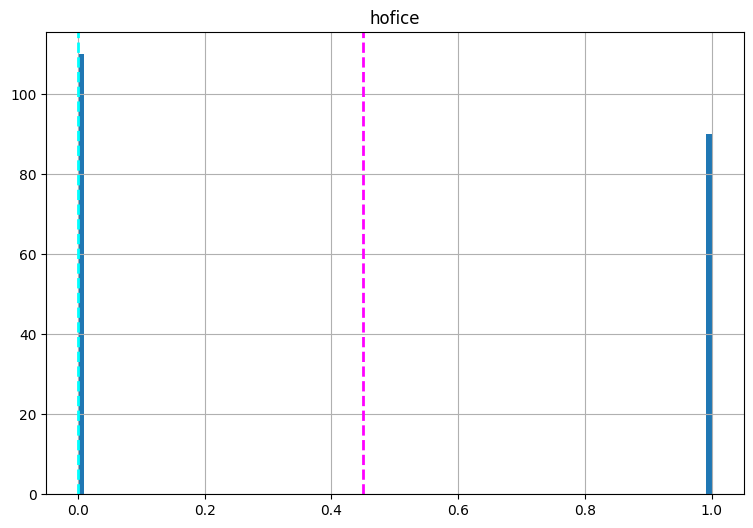

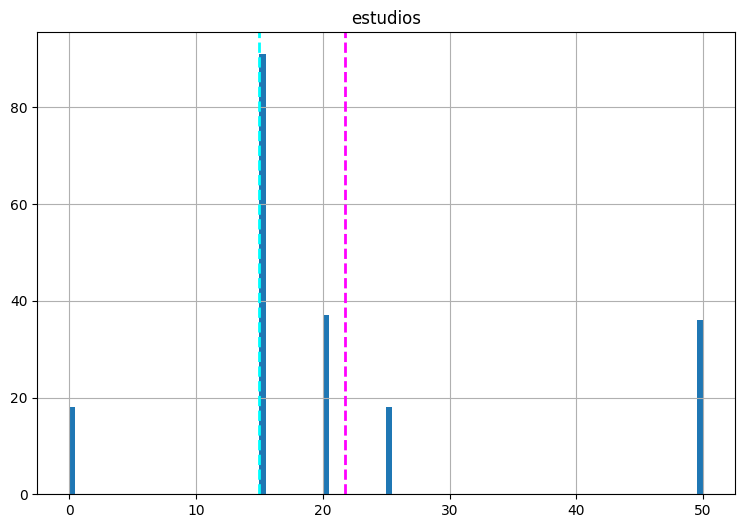

In [6]:
for col in numeric_requirements:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = work_prediction[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

## Grafico de barras para los datos categoricos

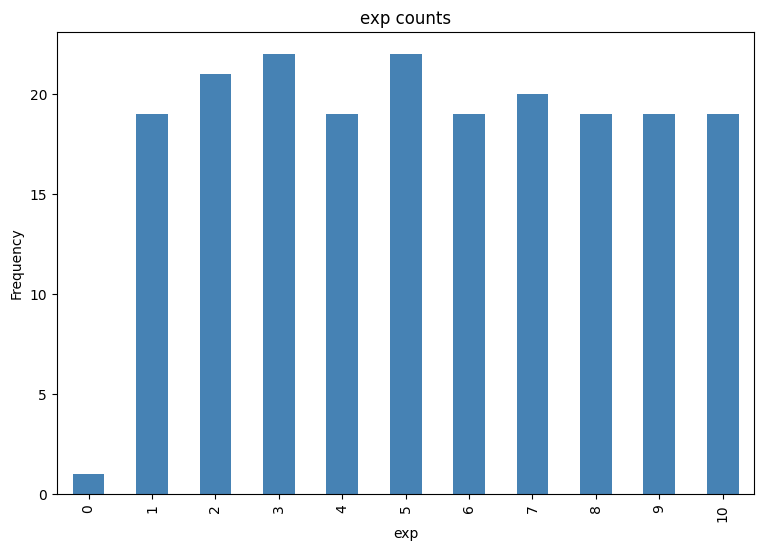

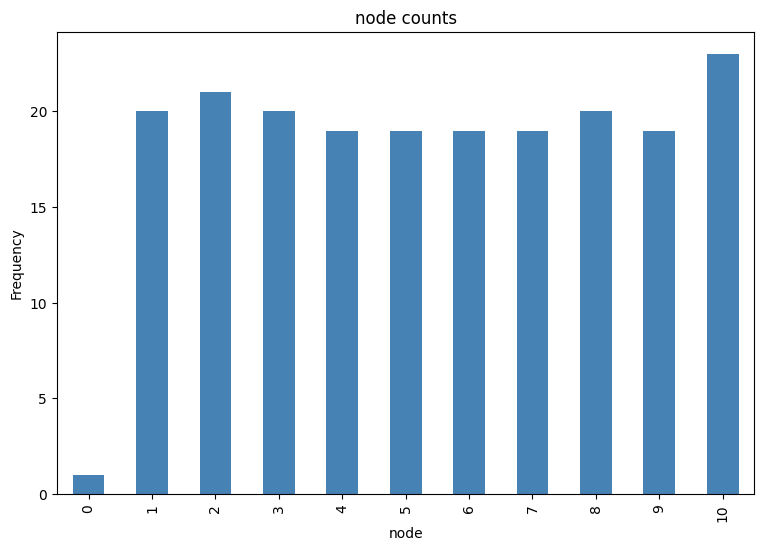

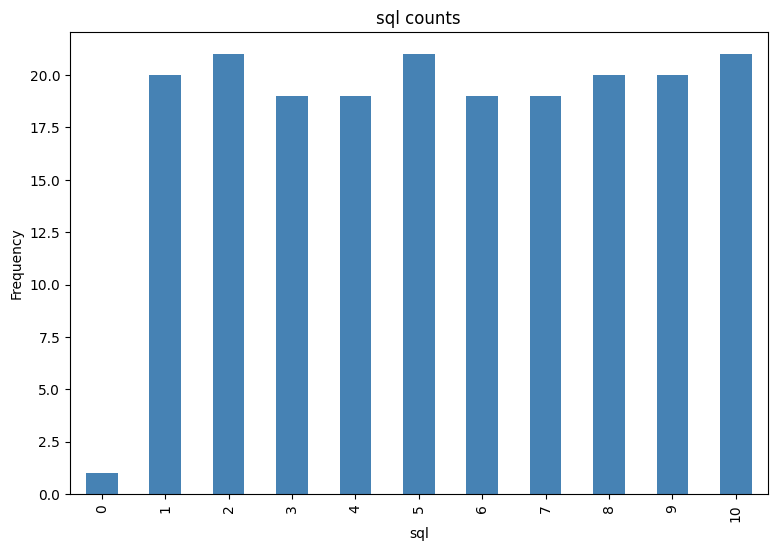

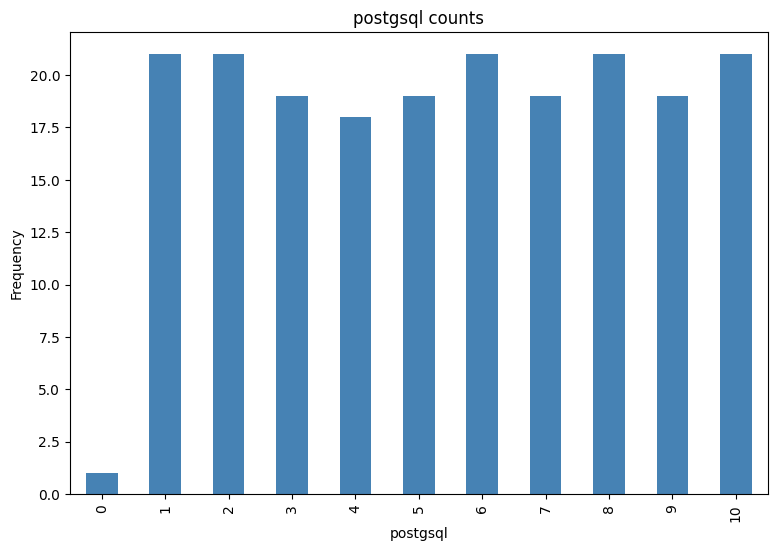

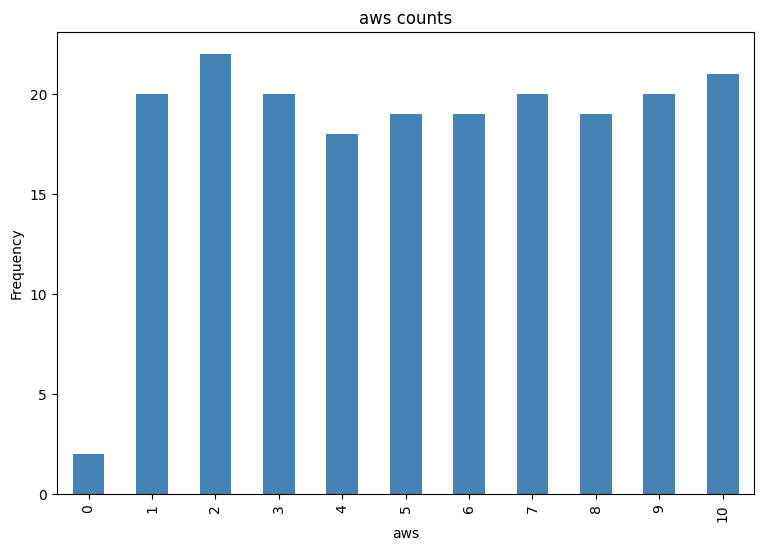

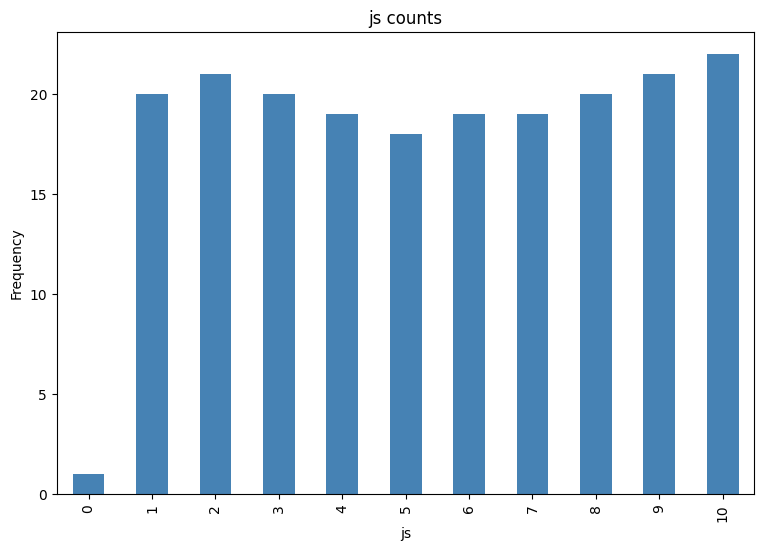

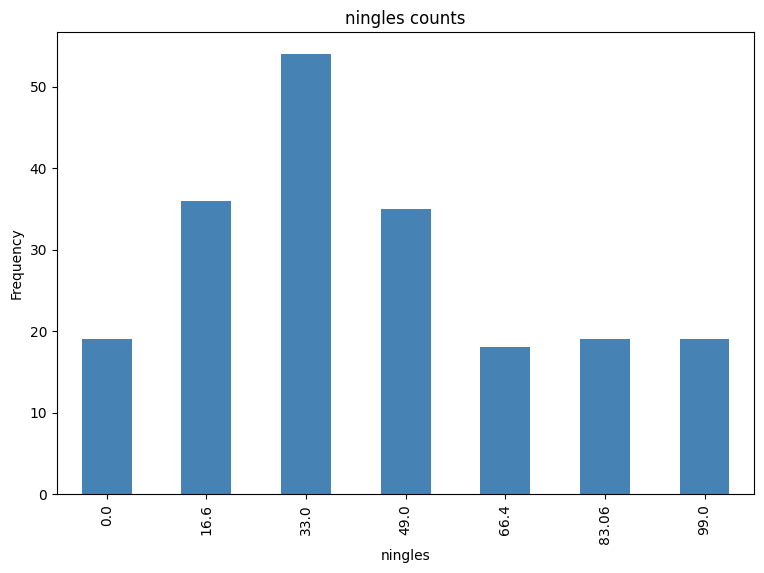

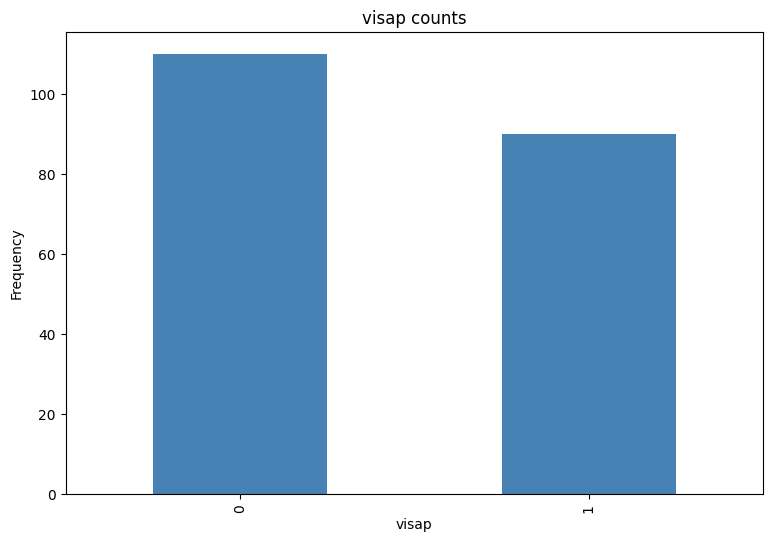

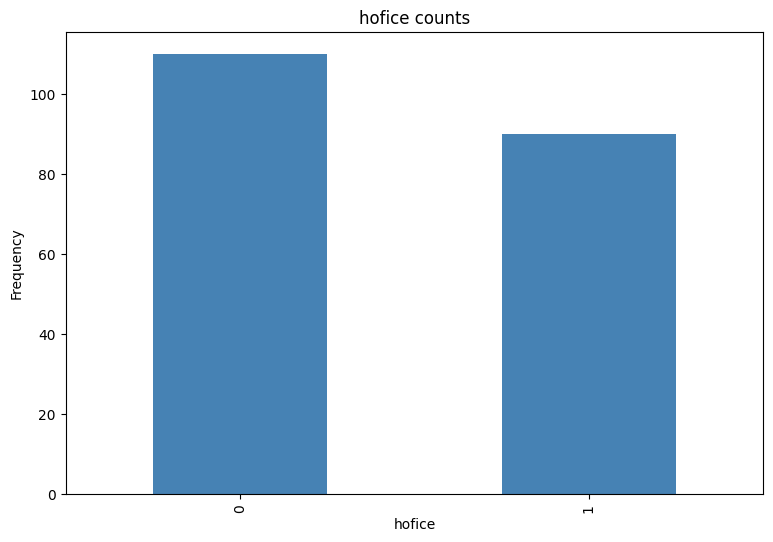

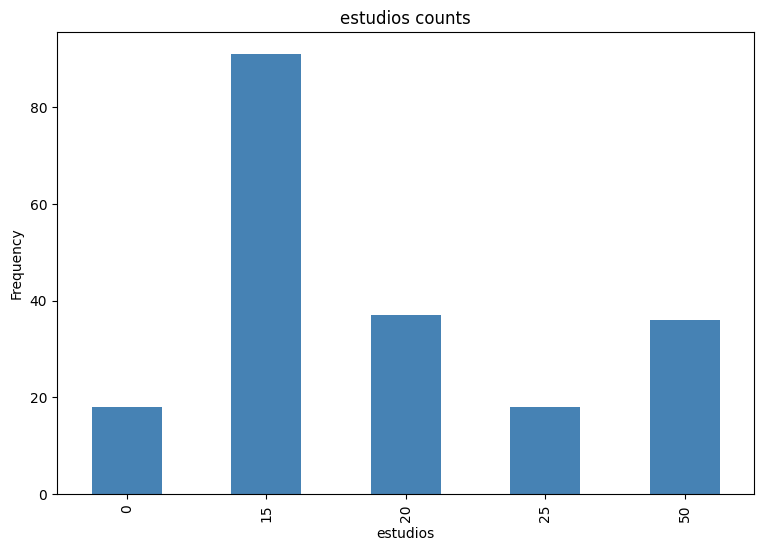

In [7]:
numeric_requirements = ["exp","node","sql","postgsql","aws","js","ningles","visap","hofice","estudios"]
for col in numeric_requirements:
    counts = work_prediction[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

## distribución de puntos

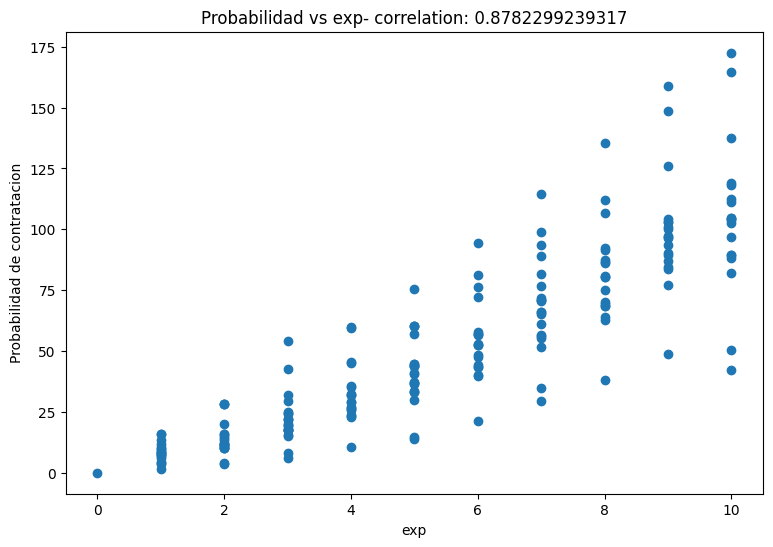

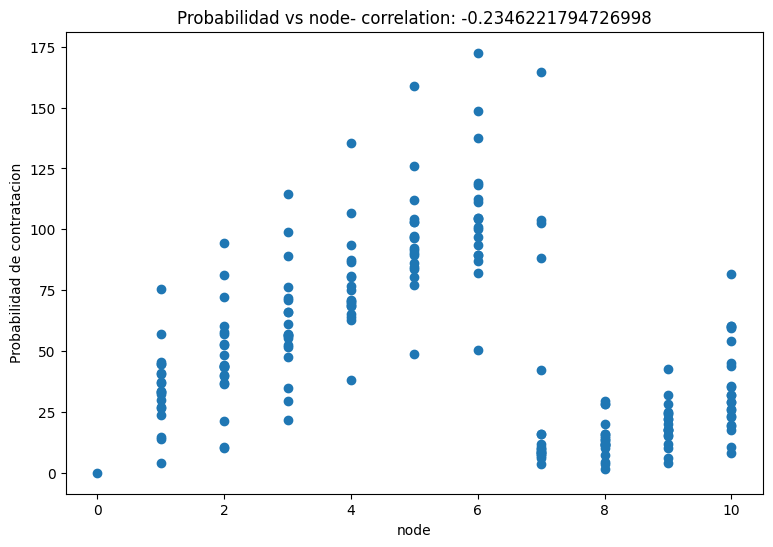

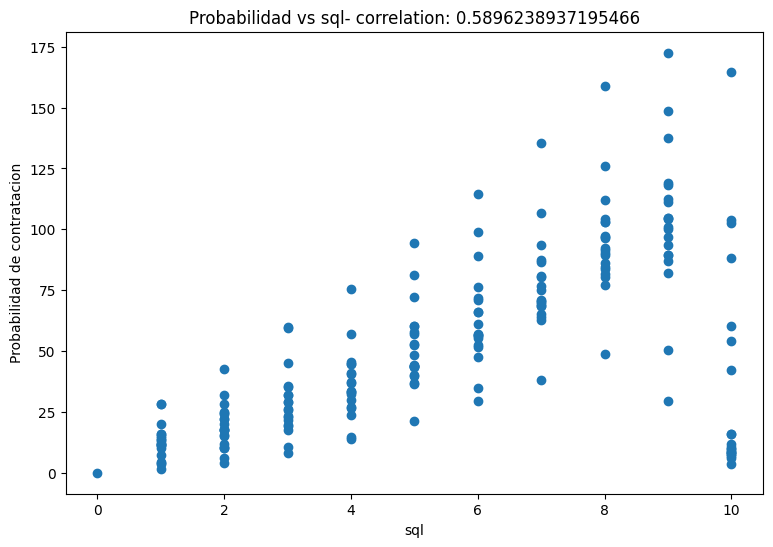

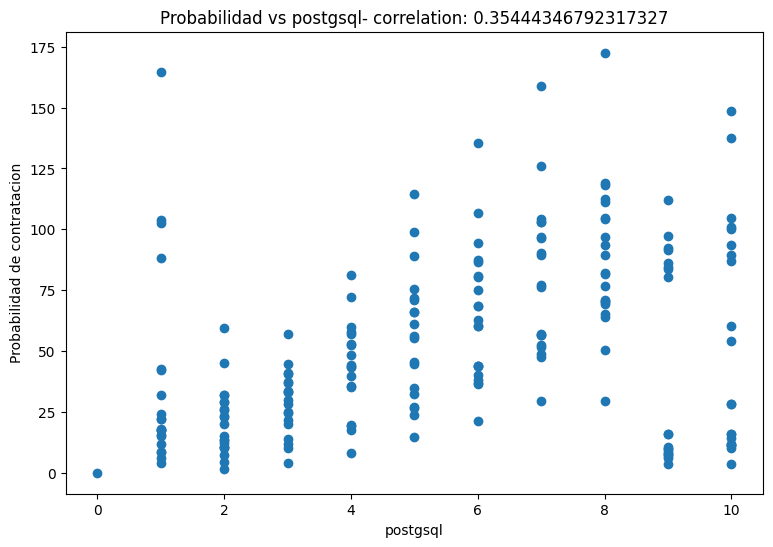

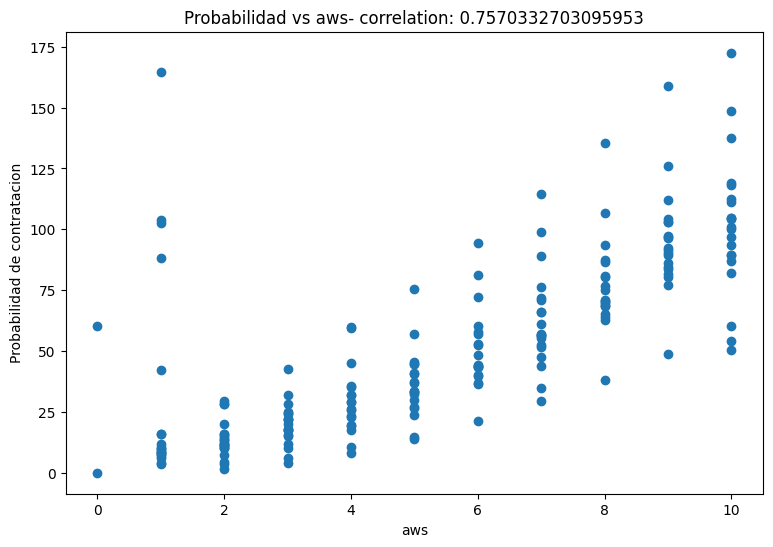

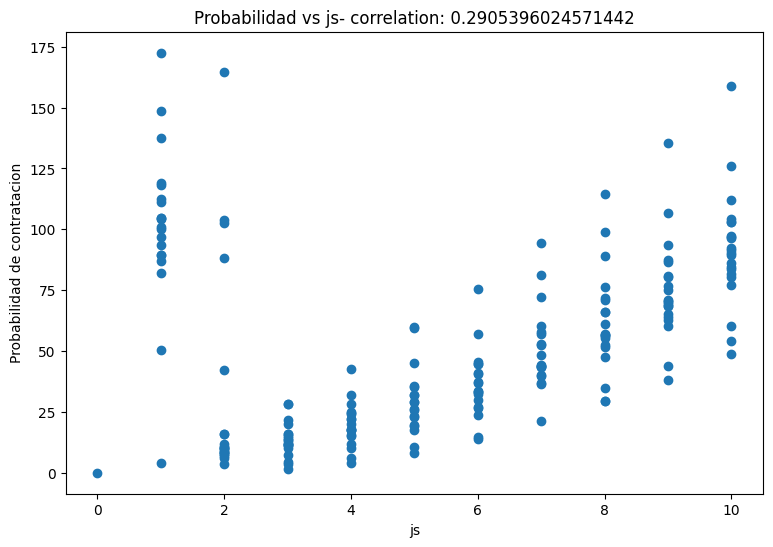

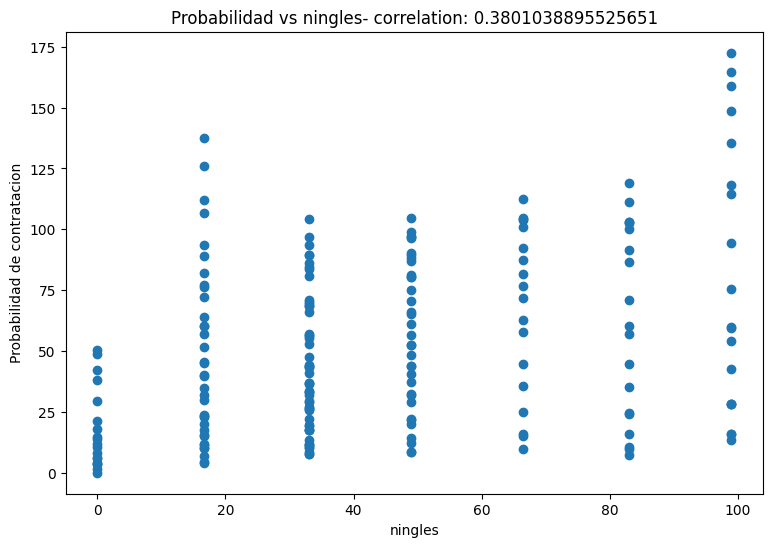

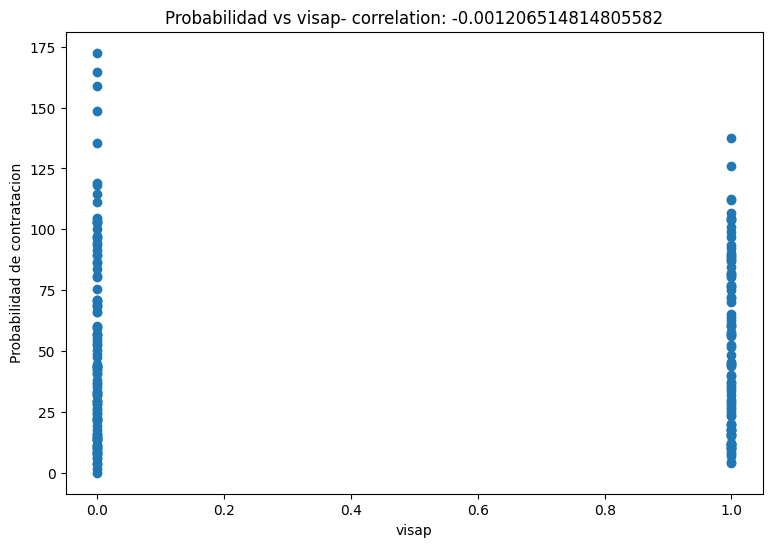

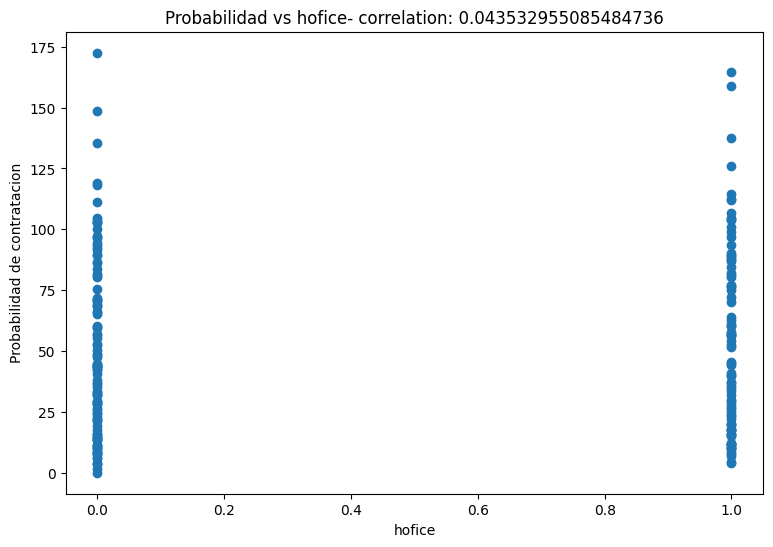

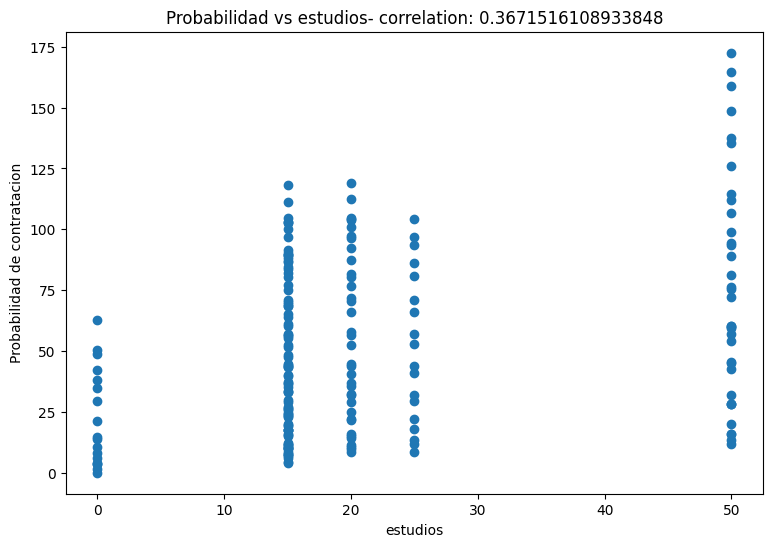

In [8]:
for col in numeric_requirements:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = work_prediction[col]
    label = work_prediction['probabilidad']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Probabilidad de contratacion')
    ax.set_title('Probabilidad vs ' + col + '- correlation: ' + str(correlation))
plt.show()

## Trazo de diagrama de caja por cada uno de las categorias

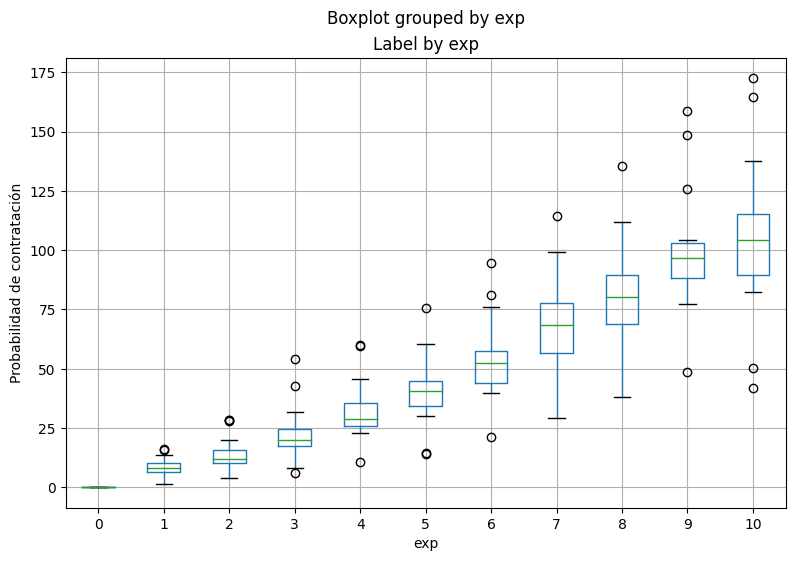

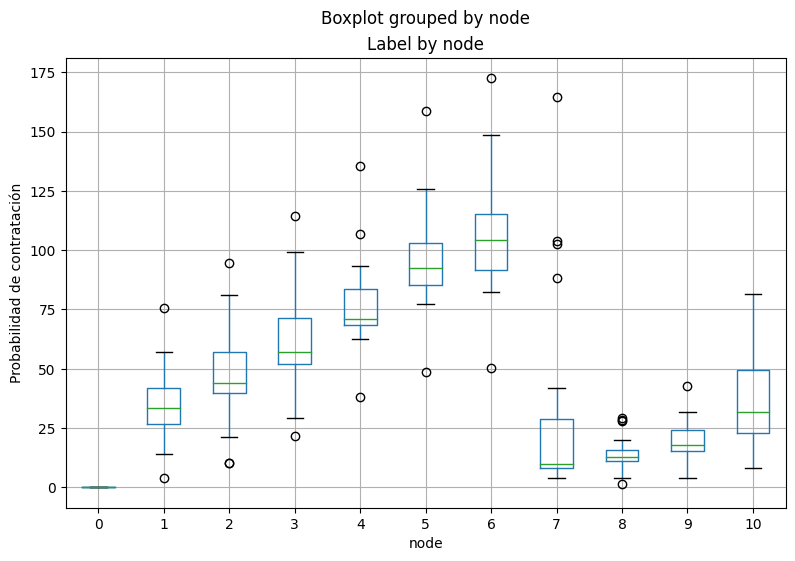

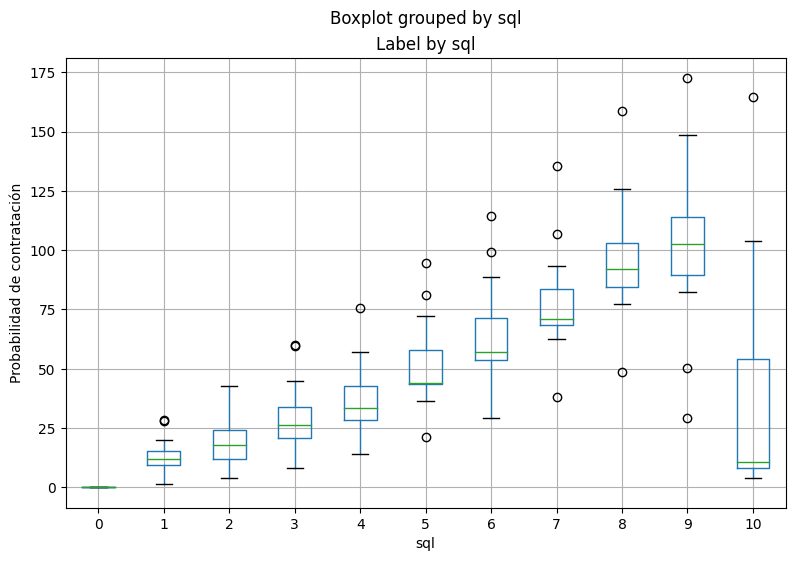

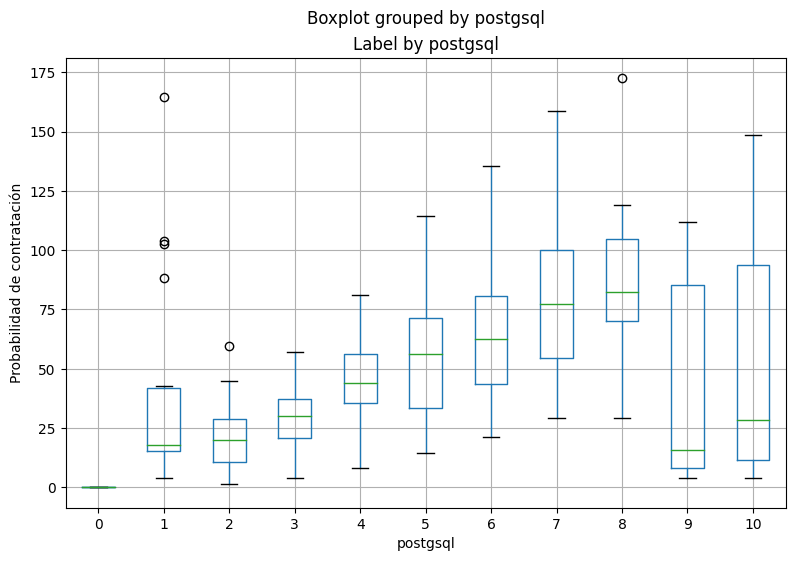

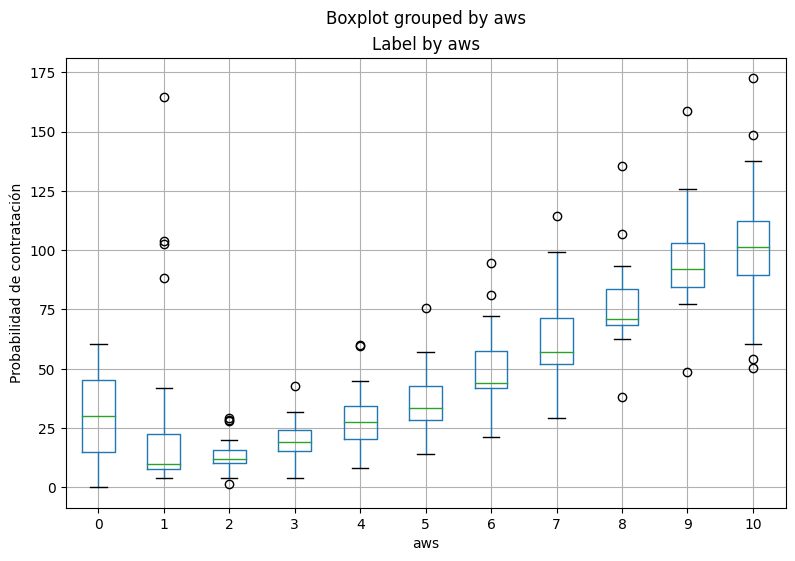

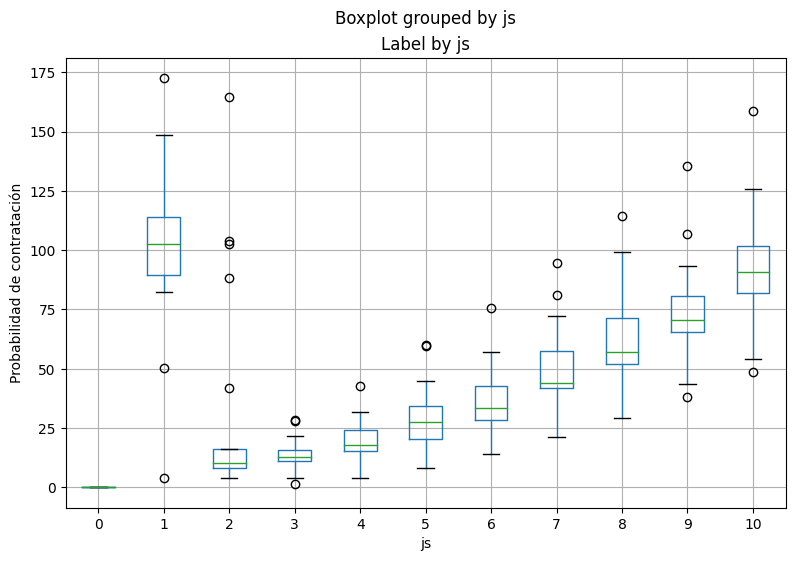

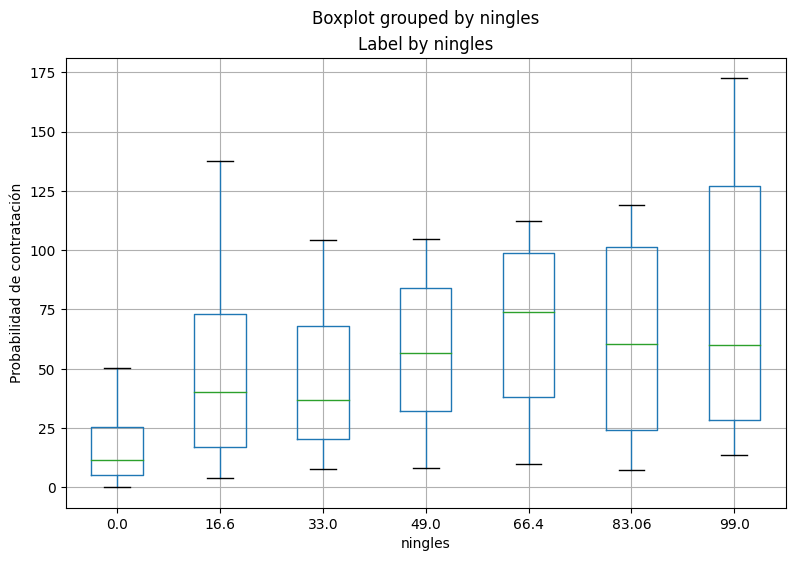

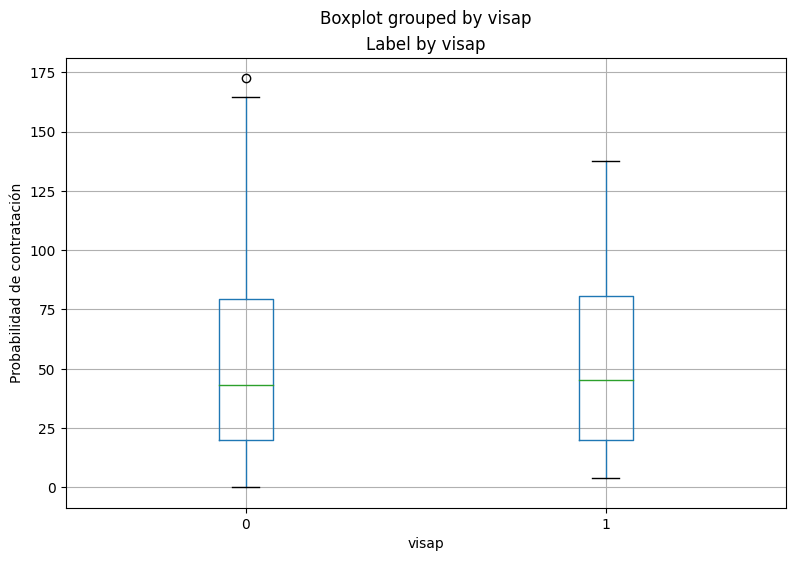

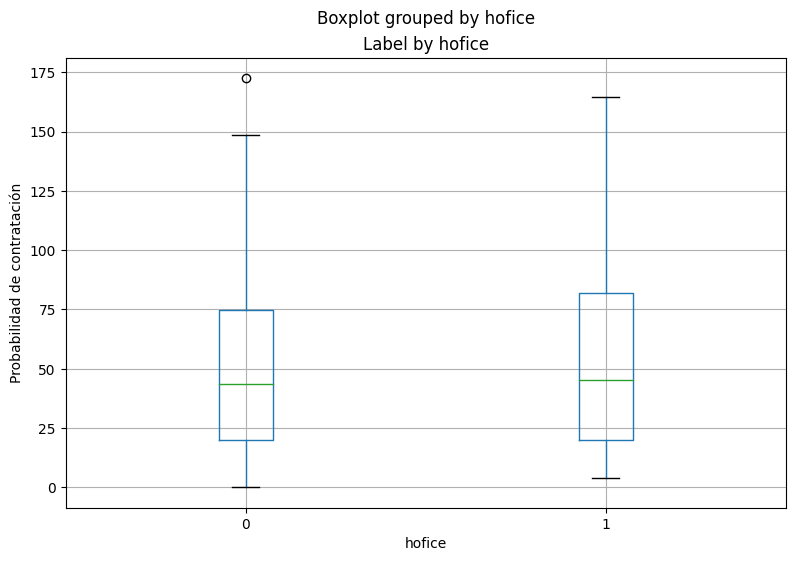

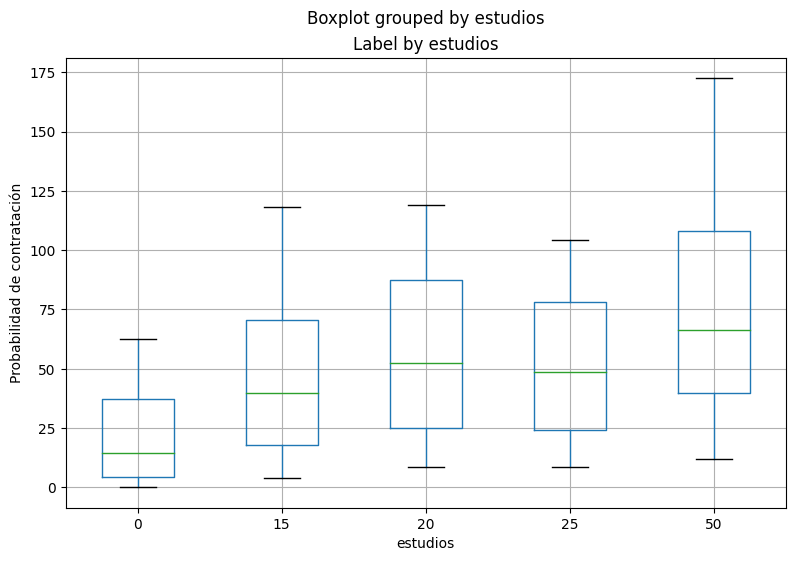

In [9]:
for col in numeric_requirements:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    work_prediction.boxplot(column = 'probabilidad', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Probabilidad de contratación")
plt.show()

## Separar caracteristicas y etiquetas

In [10]:
x, y = work_prediction[["exp", "node", "sql", "postgsql", "aws", "js", "ningles",
                        "visap", "hofice", "estudios"]].values, work_prediction["probabilidad"].values
print("Features: ", x[:10],"\nLabels: ", y[:10], sep='\n')


Features: 
[[ 5.   10.    5.    6.    0.    9.   16.6   1.    1.   50.  ]
 [ 3.    8.    9.    8.    2.    8.   33.    0.    1.   25.  ]
 [ 5.   10.    5.    6.    7.    9.   49.    1.    0.   15.  ]
 [ 7.   10.    8.    8.    9.   10.   66.4   1.    0.   20.  ]
 [ 5.   10.   10.   10.   10.   10.   83.06  0.    0.   15.  ]
 [ 3.   10.   10.   10.   10.   10.   99.    0.    1.   50.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.    1.    1.    1.    1.    1.   16.6   1.    1.   15.  ]
 [ 2.    2.    2.    2.    2.    2.   33.    1.    1.   15.  ]
 [ 2.    2.    2.    2.    2.    2.   33.    0.    0.   15.  ]]

Labels: 
[60.235  29.28   43.65   81.466  60.3135 54.165   0.      3.822  10.42
 10.22  ]


## Divir datos por porcentaje del 30% hasta un 70%

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 140 rows
Test Set: 60 rows


## Ajuste de modelo 

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [13]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Etiqueta prevista: ', np.round(predictions)[:10])
print('Etiqueta Actual  : ' ,y_test[:10])

Etiqueta prevista:  [ -9.  70.   2.  14.  43.  78.  80. 109.  47.  48.]
Etiqueta Actual  :  [  4.522  59.42    7.61   14.31   16.005  81.03   54.165 112.38   44.05
  43.56 ]


### Linea de regreción

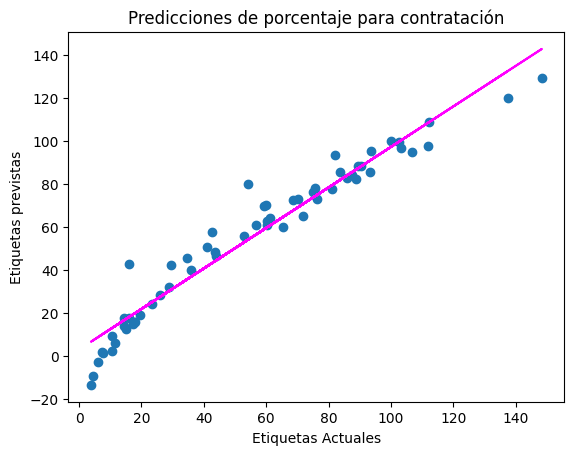

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas Actuales')
plt.ylabel('Etiquetas previstas')
plt.title('Predicciones de porcentaje para contratación')
# 
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Calculo de error predictivo por cada registro

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 75.62172675842041
RMSE: 8.696075365267967
R2: 0.9434267531488779


# Modelo Experimental

### Importar librerias nesesarias

In [16]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Conjunto de datos de entrenamiento

In [17]:
work_prediction = pd.read_csv('works_oferts.csv')
numeric_features = ["ningles",
                    "visap", "hofice", "estudios"]
categorical_features = ["exp", "node", "sql", "postgsql", "aws", "js"]
work_prediction[numeric_features + ['probabilidad']].describe()
print(work_prediction.head())

       name  edad  exp  node  sql  postgsql  aws  js  ningles  visap  hofice  \
0     Narmo    25    5    10    5         6    0   9    16.60      1       1   
1   Gustavo    21    3     8    9         8    2   8    33.00      0       1   
2  Mauricio    26    5    10    5         6    7   9    49.00      1       0   
3   Gabriel    30    7    10    8         8    9  10    66.40      1       0   
4         x    34    5    10   10        10   10  10    83.06      0       0   

   estudios  probabilidad  
0        50       60.2350  
1        25       29.2800  
2        15       43.6500  
3        20       81.4660  
4        15       60.3135  


### Caracteristicas separadas por matriz en "X" y "Y"

In [18]:
x, y = work_prediction[["exp", "node", "sql", "postgsql",
                        "aws", "js", "ningles", "visap", "hofice", "estudios"]].values, work_prediction["probabilidad"].values


## Dividir los datos en 70-30

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=0)

print('Set de entrenamiento: %d Filas\nTest Set: %d Filas' %
      (X_train.shape[0], X_test.shape[0]))


Set de entrenamiento: 140 Filas
Test Set: 60 Filas


## Modelo de lazo en para entramiento del modelo

In [20]:

from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
print (model, "\n")


Lasso() 



### Prediccion con datos de prueva

In [21]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 67.47806586301988
RMSE: 8.214503385051337
R2: 0.9495190940389386


### Grafico predicicio vs Grafico Real

Text(0.5, 1.0, 'Predicciones de probabilidad de contratación')

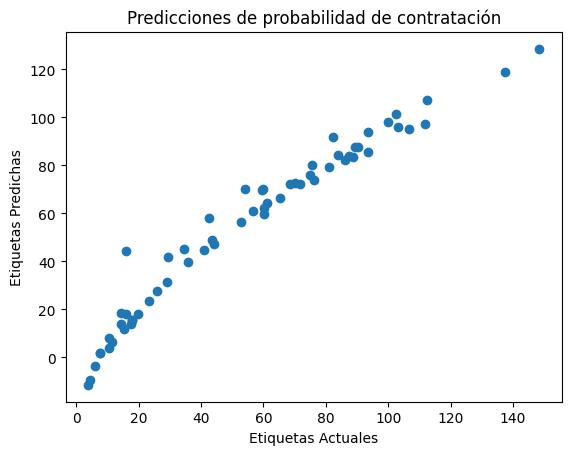

In [22]:
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas Actuales')
plt.ylabel('Etiquetas Predichas')
plt.title('Predicciones de probabilidad de contratación')

## Linea de regreción

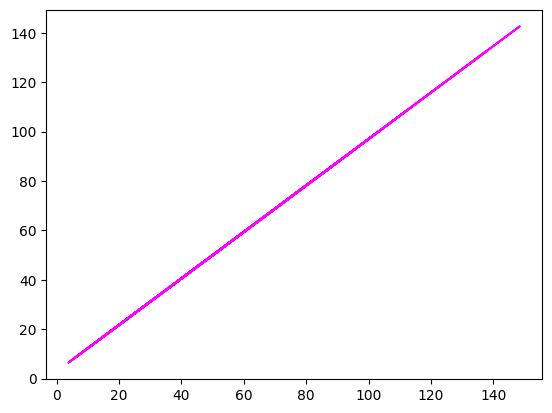

In [23]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Entrenar el moddelo

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

DecisionTreeRegressor() 



## Arbol de deciciones

In [25]:
tree = export_text(model)
print(tree)

|--- feature_0 <= 6.50
|   |--- feature_0 <= 3.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_9 <= 37.50
|   |   |   |   |--- feature_9 <= 7.50
|   |   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |   |--- feature_4 <= 1.00
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- feature_4 >  1.00
|   |   |   |   |   |   |   |--- value: [1.35]
|   |   |   |   |   |--- feature_3 >  2.50
|   |   |   |   |   |   |--- feature_3 <= 6.00
|   |   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |   |--- feature_3 >  6.00
|   |   |   |   |   |   |   |--- value: [3.70]
|   |   |   |   |--- feature_9 >  7.50
|   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |--- feature_6 <= 24.80
|   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [6.03]
|   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |   |--- value: [6.87]
|   |   |   |   |   |   |--- feature_6 >  24.80


### Evaluar el modelo con datos de prueba

In [26]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 85.78386291733334
RMSE: 9.261957833921148
R2: 0.9358243740166283


## Grafico Predicciticio vs Grafico Real

Text(0.5, 1.0, 'Porcentage de probabilidad de contratación')

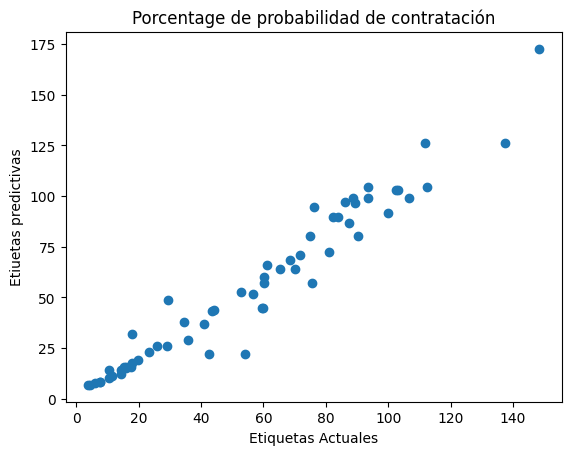

In [27]:
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas Actuales')
plt.ylabel('Etiuetas predictivas')
plt.title('Porcentage de probabilidad de contratación')

### Linea de regreción

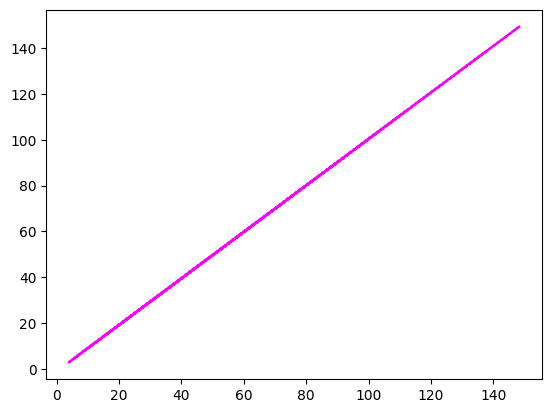

In [28]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()   


### Entrenar modelo con datos de prueba

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

RandomForestRegressor() 



### Evaluacion de modelo con datos de prueba

In [30]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 49.30630214838265
RMSE: 7.021844640006118
R2: 0.9631135425977844


### Gráfico predicho vs real

Text(0.5, 1.0, 'Procentaje de probabilidad de contratación')

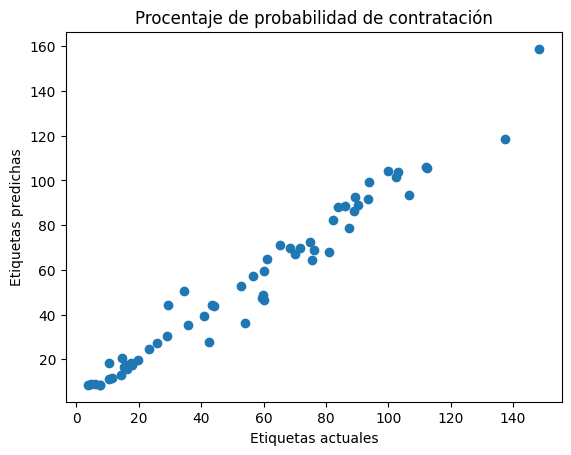

In [31]:
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predichas')
plt.title('Procentaje de probabilidad de contratación')

### Linea de regreción

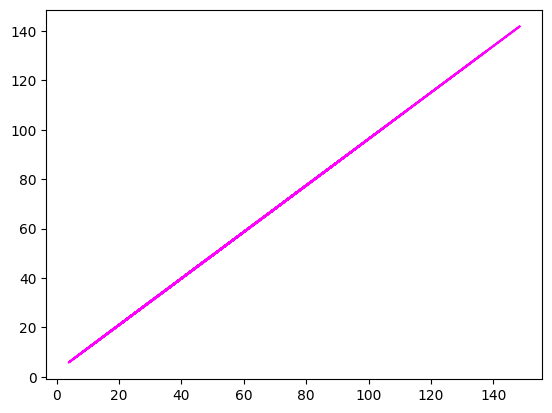

In [32]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Entrenamiento de modelo

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

### Modelo de lazo

In [34]:
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

GradientBoostingRegressor() 



### Evaluación de modelo con datos de prueba

In [35]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 17.41298267313672
RMSE: 4.172886611583967
R2: 0.9869732018903947


### Grafico predicticio vs real

Text(0.5, 1.0, 'Procentaje de probabilidad de contratación')

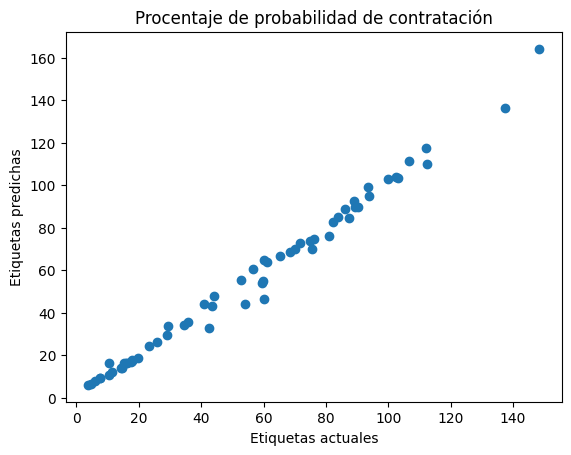

In [36]:
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predichas')
plt.title('Procentaje de probabilidad de contratación')

## Regrecion

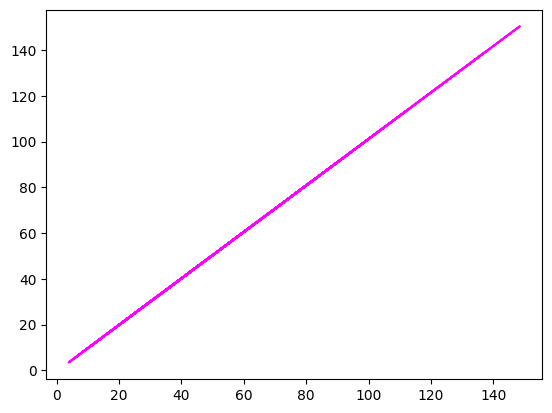

In [37]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Guardar modelo

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Cargar el conjunto de datos de entrenamiento

In [39]:
work_prediction = pd.read_csv('works_oferts.csv')
numeric_features = ["ningles",
                    "visap", "hofice", "estudios"]
categorical_features = ["exp", "node", "sql", "postgsql", "aws", "js"]
work_prediction[numeric_features + ['probabilidad']].describe()
print(work_prediction.head())

       name  edad  exp  node  sql  postgsql  aws  js  ningles  visap  hofice  \
0     Narmo    25    5    10    5         6    0   9    16.60      1       1   
1   Gustavo    21    3     8    9         8    2   8    33.00      0       1   
2  Mauricio    26    5    10    5         6    7   9    49.00      1       0   
3   Gabriel    30    7    10    8         8    9  10    66.40      1       0   
4         x    34    5    10   10        10   10  10    83.06      0       0   

   estudios  probabilidad  
0        50       60.2350  
1        25       29.2800  
2        15       43.6500  
3        20       81.4660  
4        15       60.3135  


## Separar por matrises de datos X & Y

In [40]:
x, y = work_prediction[["exp", "node", "sql", "postgsql",
                        "aws", "js", "ningles", "visap", "hofice", "estudios"]].values, work_prediction["probabilidad"].values

### Dividir los datos 70%-30% en conjunto de entrenamiento y conjunto de prueba

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 140 rows
Test Set: 60 rows


### Entrenar el modelo

In [42]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

### Encajar modelo de lazo

In [43]:
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

GradientBoostingRegressor() 



### Evaluiar entrenamiento con datos de prueba

In [44]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 17.937759040187718
RMSE: 4.235299167731569
R2: 0.9865806122970673


### Grafico predicticio vs Grafico real

Text(0.5, 1.0, 'Procentaje de probabilidad de contratación')

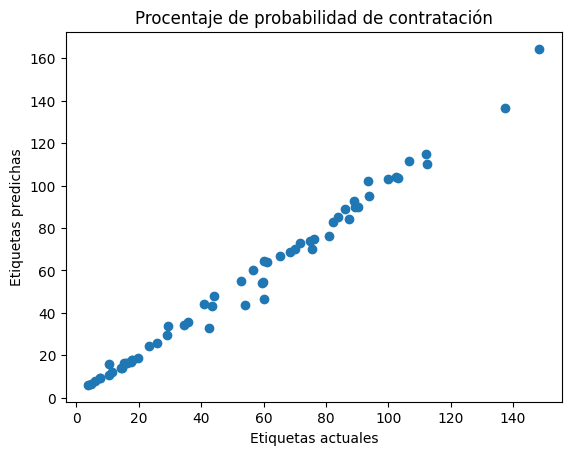

In [45]:
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predichas')
plt.title('Procentaje de probabilidad de contratación')

### Linea de regreción

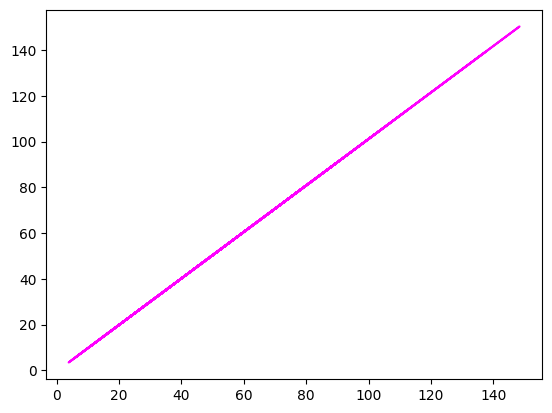

In [46]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Usar algoritmo como un aumento de gradiante

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
alg = GradientBoostingRegressor()

In [48]:
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

### Encontrar las mejores combinaciones de hiperparamtetros para optimizar el valor de R2 

In [50]:
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Mejor combinación de valores:", gridsearch.best_params_, "\n")

Mejor combinación de valores: {'learning_rate': 0.1, 'n_estimators': 150} 



### Obtener el modelo predicticio

In [51]:
model=gridsearch.best_estimator_
print(model, "\n")

GradientBoostingRegressor(n_estimators=150) 



### Evaluar el modelo con datos de prueba

In [52]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 17.81272840472322
RMSE: 4.220512813003086
R2: 0.9866741487621454


### Grafico prediccticio vs grafico real

Text(0.5, 1.0, 'Procentaje de probabilidad de contratación')

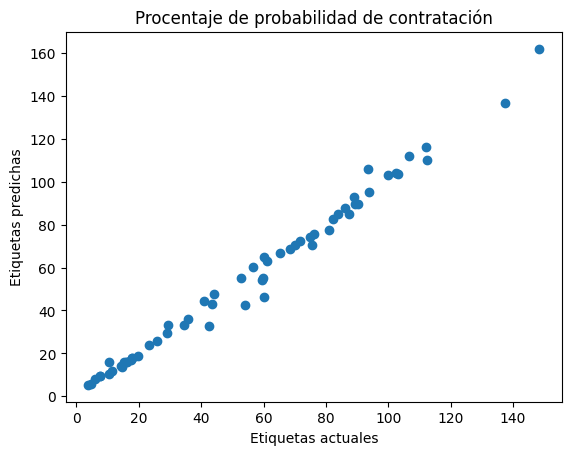

In [53]:
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predichas')
plt.title('Procentaje de probabilidad de contratación')

### Linea de regreción

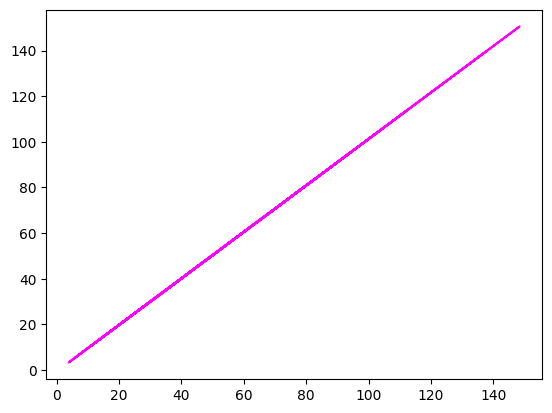

In [54]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

### Usar el algoritmo para aumento de gradiante

In [56]:
alg = GradientBoostingRegressor()

### Prueba de hiperparametros

In [57]:
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [40, 90, 140]
 }


### Encontrar la mejor combinación de hiperparametros para disminuir el valor de R2

In [58]:
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 140} 



### Conseguir el modelo

In [59]:
model=gridsearch.best_estimator_
print(model, "\n")

GradientBoostingRegressor(n_estimators=140) 



### Evaluar modelo con datos de prueba

In [60]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 17.074575142306454
RMSE: 4.132139293671797
R2: 0.987226367397169


### Gráfico predicticio vs real

Text(0.5, 1.0, 'Procentaje de probabilidad de contratación')

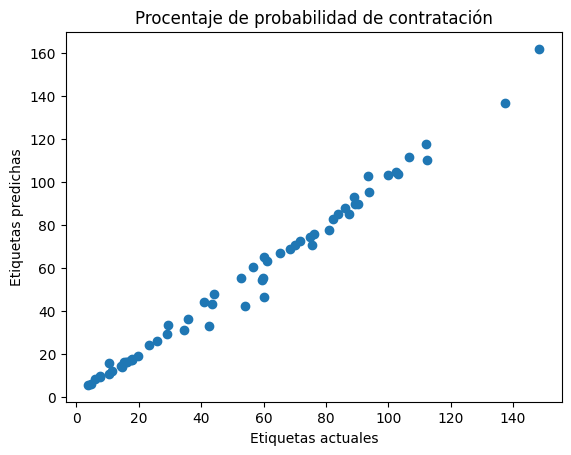

In [61]:
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predichas')
plt.title('Procentaje de probabilidad de contratación')

### Linea de regreción

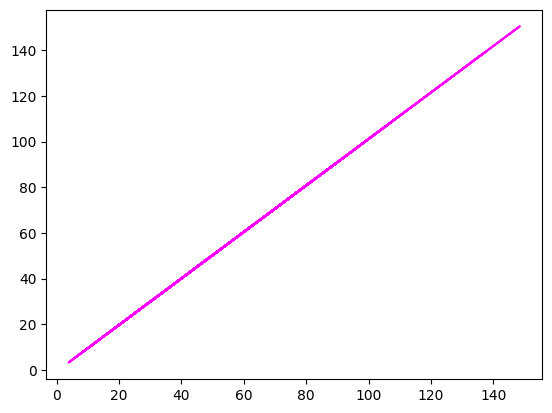

In [62]:
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Entremaiento de modelo

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

### Definir el preprosamiento de las columnas numericas

In [65]:
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

### Procesamiento de caracteristicas categoricas

In [66]:
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

### Combinacions de procesamientos

In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Canalizacion de procesamiento

In [68]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])

### Ajuste de canalización

In [70]:
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


### Retornar predicciones

In [71]:
predictions = model.predict(X_test)

### Mostrar metricas

In [72]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 45.90477472170771
RMSE: 6.775306245603051
R2: 0.9656582537413807


### Grafico prediccticio vs Grafico real

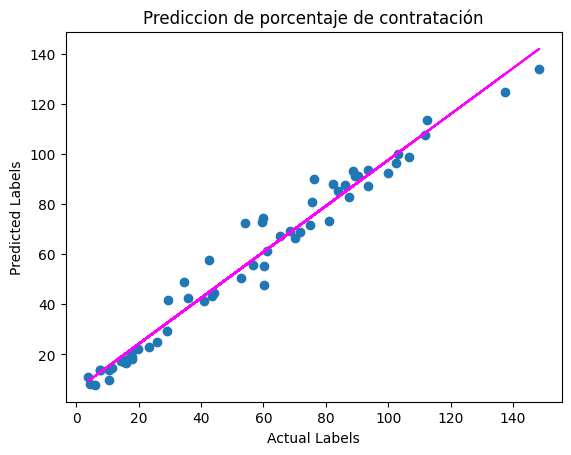

In [73]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Prediccion de porcentaje de contratación')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Estimador diferente para ser canalisado

In [74]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

### Ajuste de canalización

In [75]:
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 



### Retornar predicciones

In [76]:
predictions = model.predict(X_test)

### Mostrar predicciones

In [77]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 81.07010772639133
RMSE: 9.003894031272877
R2: 0.9393507737359157


### Grafico real vs predictivo

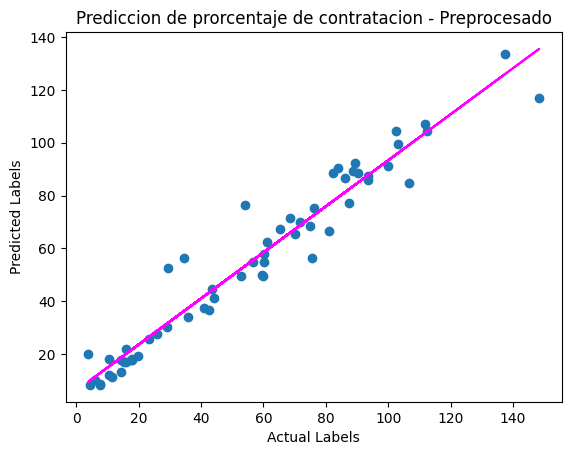

In [78]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Prediccion de prorcentaje de contratacion - Preprocesado')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()



### Obter modelo para usar en API

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from joblib import *
import numpy as np
import pandas as pd

### Gurdar modelo

In [84]:
work_prediction = pd.read_csv("works_oferts.csv")
x = work_prediction[["exp", "node", "sql", "postgsql",
                        "aws", "js", "ningles", "visap", "hofice", "estudios"]].values
y = work_prediction["probabilidad"].values
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=0)

model = LinearRegression().fit(x_train , y_train)
predictions = model.predict(x_test)

print(x_test[0])
print(predictions[0])


dump(model, 'model.joblib') 

[ 1.   8.   1.   2.   2.   3.  16.6  1.   1.  15. ]
-9.255958893083147


['model.joblib']